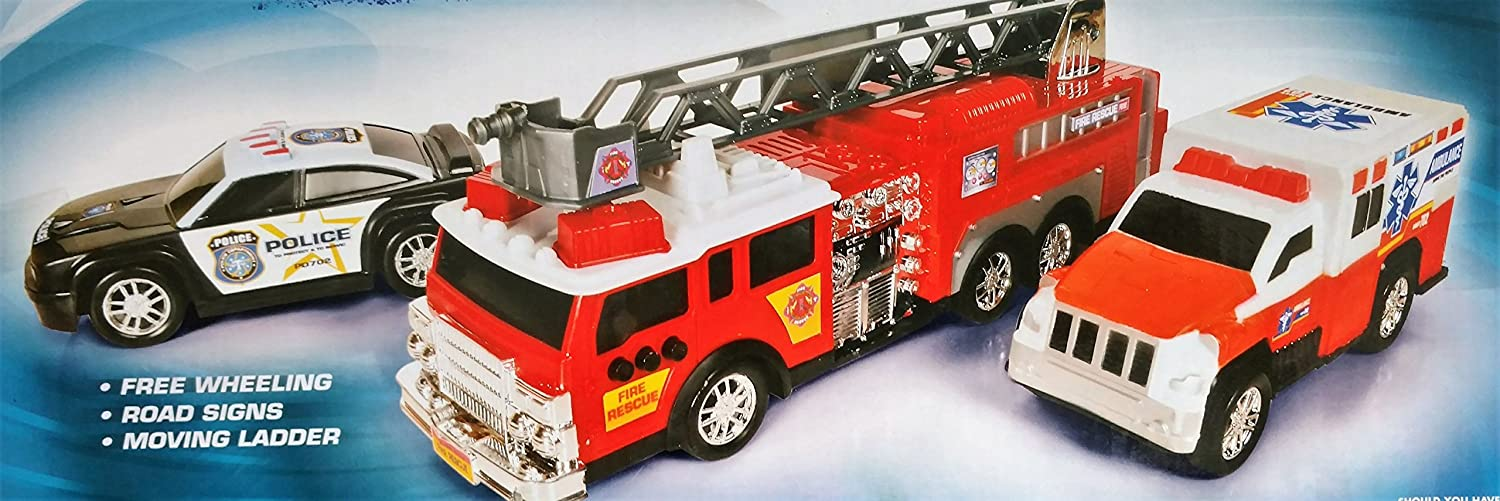

In [6]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [9]:
training_set = train_datagen.flow_from_directory('C:/Users/venuk/OneDrive/Desktop/multi_class_image/data_sets',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 32 images belonging to 4 classes.


In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/venuk/OneDrive/Desktop/multi_class_image/data_sets',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 32 images belonging to 4 classes.


In [11]:
#Initialising the CNN
cnn = tf.keras.models.Sequential()

In [12]:
#adding convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [13]:
# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [14]:
# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [15]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [16]:
#Full Connection layer 1
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


In [17]:
#Full Connection layer 2
cnn.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [18]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [19]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
# Training the CNN 

cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
1/1 [==============================] - 0s 497ms/step - loss: 1.3854 - accuracy: 0.2812 - val_loss: 1.3291 - val_accuracy: 0.3438
Epoch 2/30
1/1 [==============================] - 0s 142ms/step - loss: 1.3274 - accuracy: 0.3438 - val_loss: 1.2653 - val_accuracy: 0.3438
Epoch 3/30
1/1 [==============================] - 0s 148ms/step - loss: 1.2541 - accuracy: 0.3750 - val_loss: 1.2404 - val_accuracy: 0.3750
Epoch 4/30
1/1 [==============================] - 0s 149ms/step - loss: 1.2441 - accuracy: 0.4062 - val_loss: 1.1062 - val_accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 167ms/step - loss: 1.1385 - accuracy: 0.4375 - val_loss: 1.0011 - val_accuracy: 0.6562
Epoch 6/30
1/1 [==============================] - 0s 151ms/step - loss: 1.0100 - accuracy: 0.5938 - val_loss: 0.9380 - val_accuracy: 0.6875
Epoch 7/30
1/1 [==============================] - 0s 178ms/step - loss: 0.9696 - accuracy: 0.7500 - val_loss: 0.8100 - val_accuracy: 0.8125
Epoch 8/30
1/1 [====

In [21]:
import numpy as np
from keras.preprocessing import image

In [22]:
# given fire engine image
test_image = image.load_img('C:/Users/venuk/OneDrive/Desktop/multi_class_image/test_image.jpg', target_size = (64, 64))

TEST IMAGE:

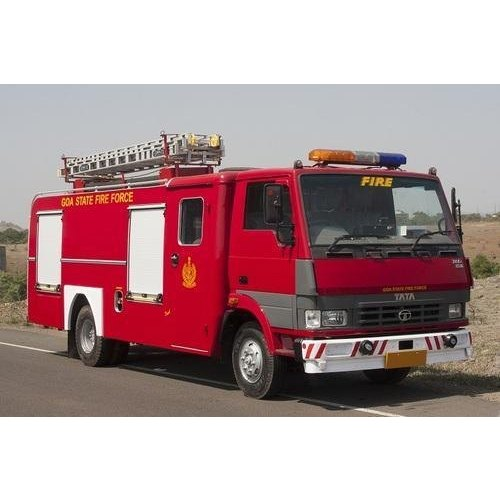

In [23]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

{'ambulance': 0, 'fireengine': 1, 'normal car': 2, 'policecar': 3}

In [24]:
result

array([[0., 1., 0., 0.]], dtype=float32)

In [25]:
test_image2 = image.load_img('C:/Users/venuk/OneDrive/Desktop/multi_class_image/test_image1.jpg', target_size = (64, 64))

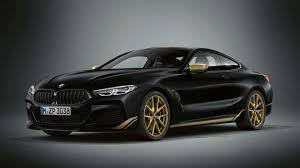

In [26]:
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
result1 = cnn.predict(test_image2)
training_set.class_indices

{'ambulance': 0, 'fireengine': 1, 'normal car': 2, 'policecar': 3}

In [27]:
result1

array([[0., 0., 1., 0.]], dtype=float32)